# A/B tests
在本案例研究中，您将应用您在置信区间和假设检验中学到的知识，以帮助公司决定是否在其网站上启动两项新功能。为此，您将分析A / B测试的结果，这是一种在工业中有价值且广泛使用的方法。



A/B 测试用于测试网页的修改效果，测试需进行一场实验，实验中**对照组**为网页旧版本，**实验组**为网页新版本，实验还需选出一个**指标** 来衡量每组用户的参与度，然后根据实验结果来判断哪个版本效果更好。从以下假设来看，A/B 测试很像假设检验： 

- **零假设：** 新版本不比旧版本好，甚至比旧版本差 
- **对立假设：**新版本比旧版本好 

如果我们无法推翻零假设，那得到的实验结果就会暗示我们得保留旧版本；如果我们推翻了零假设，那得到的实验结果就会暗示我们可实现网页改动。通过这些测试，我们可以观察什么样的改动能最大化指标，测试适用的改动类型十分广泛，上到增加元素的大改动，下到颜色小变动都可使用这些测试。 

但 A/B 测试也有不足之处。虽然测试能帮你比较两种选择，但无法告诉你你还没想到的选择，在对老用户进行测试时，抗拒改变心理、新奇效应等因素都可能使测试结果出现偏差。 

- **抗拒改变心理：**老用户可能会因为纯粹不喜欢改变而偏爱旧版本，哪怕从长远来看新版本更好。 
- **新奇效应：**老用户可能会觉得变化很新鲜，受变化吸引而偏爱新版本，哪怕从长远看来新版本并无益处。 

关于这些因素，稍后你会得到进一步的了解。 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.mjhqt7honf.png)

# 商业案例 

在本次案例研究中，你将为 Audacity 分析 A/B 测试的结果，以下是该公司网站典型新用户的客户漏斗模型： 

**浏览主页 > 探索课程 > 浏览课程概述页面 > 注册课程 > 完成课程** 

越深入漏斗模型，Audacity 就流失了越多的用户，能进入最后阶段的用户寥寥无几。为了提高学员参与度，提高每个阶段之间的转化率，Audacity 试着做出一些改动，并对改动进行了 A/B 测试。 

针对 Audacity 想做的两个改动，我们将分析相关测试结果，并根据结果建议是否该实现那两个改动。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.ik87sqt18p.png)

# 实验 I 


Audacity 想做的第一个改动是在主页上，他们希望靠这个更吸引人的新设计来增加探索课程的用户，也就是说，增加会进入下一漏斗阶段的用户。 

我们要使用的指标是主页探索课程按钮的点击率。**点击率 (CTR)** 通常是 **点击数与浏览数的比例** 。因为 Audacity 有用 cookies，所以我们可以确认单独用户，确保不重复统计同一个用户的点击率。为了进行该实验，我们对点击率作出如下定义： 

**CTR:  单独用户点击数 /  单独用户浏览数** 

确定了指标，我们可以把零假设和对立假设定义如下。 

- $H_0: CTR_{new} \leq CTR _{old}$

- $H_1: CTR_{new} > CTR _{old}$

对立假设即我们想证明正确的假设，本案例的对立假设就是新主页比旧主页有更高的点击率。零假设则是我们在分析数据前假设为真的假设，即新主页点击率小于或等于旧主页的点击率。正如你之前所见，我们可对假设进行如下处理： 

- $H_0: CTR_{new} - CTR_{old} \leq 0$

- $H_1: CTR_{new} - CTR_{old} > 0$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('datasets/ab_tests_datasets/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


## Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [3]:
# total number of actions
df['action'].count()

8188

In [4]:
# number of unique users
df['id'].unique().shape

(6328,)

In [5]:
# size of control group and experiment group
df['group'].value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

## How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [6]:
# duration of this experiment
df.timestamp
days = pd.to_datetime(df.timestamp)
days[-1:] - days[0]

8187   115 days 16:41:40.789831
Name: timestamp, dtype: timedelta64[ns]

##  What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [7]:
# action types in this experiment
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

## Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer

## Define the click through rate (CTR) for this experiment.

Answer

In [8]:
num_clisk = df.query('action == "click"').id.nunique()
num_vies_user = df.query('action == "view"').id.nunique()
num_clisk, num_vies_user, num_clisk/num_vies_user

(1860, 6328, 0.2939317319848293)

## What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: CTR_{new} - CTR_{old} \leq 0 $$

$$H_1: CTR_{new} - CTR_{old} > 0 $$

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.yj5d55a8ff8.png)

## 点击率 

我们来复习下分析这个 A/B 测试结果涉及了哪些操作。 

1. 我们计算了对照组和实验组的指标**观察差异**，即点击率； 
2. 我们为比例差异 （即点击率差异）建立了**抽样分布** 模型； 
3. 我们用这个抽样分布模型来为 **零假设分布** 建立模型，也即创建了一个随机正态分布模型，模型以 0 为中心，大小和宽度与抽样分布的一样。 
4. 我们通过找出零假设分布中大于观察差异的那部分比值，从而计算出了 **p 值**； 
5. 我们用 p 值来确定观察差异是否有 **统计显著性**。 

In [9]:
# get actions from control group
control_df = df.query('group == "control"')

# compute click through rate
# 抽取所有点击动作,得到用户的唯一数,并用这个数除以浏览页面的独立访客数量
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

# view click through rate
control_ctr

0.2797118847539016

In [10]:
# get actions from experiment group
experiment_df = df.query('group == "experiment"')

# compute click through rate
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# view click through rate
experiment_ctr

0.3097463284379172

In [11]:
# compute observed difference in click through raet
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

我们利用引导指令输入样本，模拟抽样分布的比例差，

In [12]:
# simulate sampling distribution for difference in proportions, or CTRs
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

我们先看一下抽样分布

In [13]:
# convert to numpy
diffs = np.array(diffs)

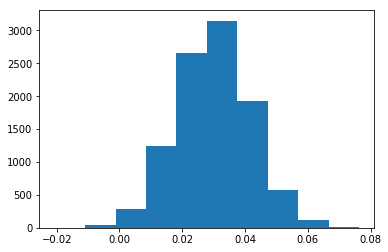

In [14]:
# plot sampling distribution
plt.hist(diffs);

创建一个以0为中心的正态分布，模拟零假设，标准差与我们模拟的抽样分布相同

In [15]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

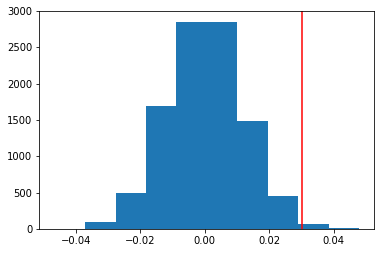

In [16]:
# plot null distribution and line at our observed differece
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

我们找不到这样的p值，因为这些空值比支持备择假设的统计量更加极端

In [17]:
# compute p-value
(null_vals > obs_diff).mean()

0.0058

得到的P值为百分之一的的一半，控制组和试验组点击率的差异，非常显著，我们可以拒绝零假设，根据这些结果，Audacity应当发布主页的新版本

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.uojbngcli9o.png)

# 实验 II  

Audacity 的第二个改动是让课程概述页面更强调职业发展，他们想对这个改动进行 A/B 测试，希望改动能鼓励更多用户注册并完成课程。本次实验我们将分析如下指标： 

1. **报名率：** 课程概述页面 _注册_ 按钮的点击率 
2. **平均浏览时长：**用户在课程概述页面停留的平均秒数 
3. **平均课室逗留时长：**课程注册学员在课室逗留的平均天数 
4. **完成率：**课程注册学员的课程完成率 

我们先来逐一判断各指标的观察差异是否具有统计显著性。 

## 注册率 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [20]:
df = pd.read_csv('datasets/ab_tests_datasets/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [21]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [22]:
# Get dataframe with all records from control group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [23]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [24]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

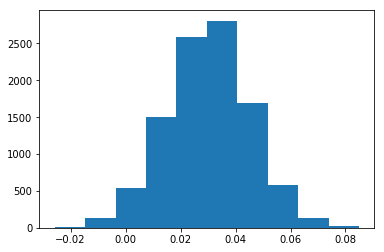

In [25]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

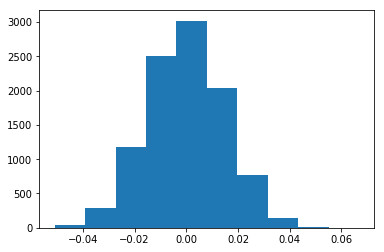

In [26]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

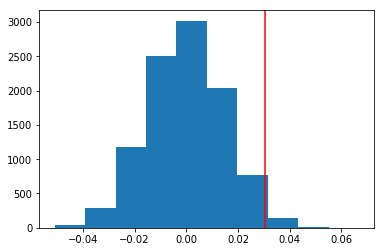

In [27]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [28]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0188

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.ad69pzll3fq.png)

## 平均浏览时长 

我们再来复习下分析这个 A/B 测试结果涉及的操作： 

1. 我们计算了对照组和实验组的指标**观察差异**，即平均浏览时长； 
2. 我们为平均差（即平均浏览时长之差）建立了**抽样分布**模型； 
3. 我们用这个抽样分布模型来为 **零假设分布** 建立模型，也即创建了一个随机正态分布模型，模型以 0 为中心，大小和宽度与抽样分布的一样； 
4. 我们找出了零假设分布中大于观察差异的那部分比值，从而算出了**p 值**； 
5. 我们用 p 值来确定观察差异是否具有**统计显著性**。

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv('datasets/ab_tests_datasets/course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [32]:
views = df.query('action=="view"')
reading_time = views.groupby(['id', 'group'])['duration'].mean()
reading_time = reading_time.reset_index()
reading_time.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [33]:
# compute average reading durations for each group
control_mean = df.query('group == "control"').duration.mean()
experiment_mean = df.query('group == "experiment"').duration.mean()
control_mean, experiment_mean

(115.40710650582038, 130.93220512539477)

In [34]:
# compute observed difference in means
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574393

In [35]:
# simulate sampling distribution for the difference in means
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"').duration.mean()
    experiment_mean = b_samp.query('group == "experiment"').duration.mean()
    diffs.append(experiment_mean - control_mean)

In [36]:
# convert to numpy array
diffs = np.array(diffs)

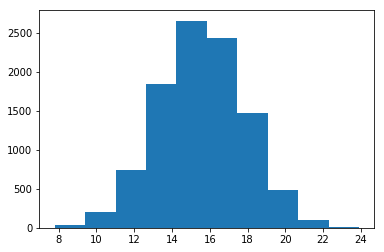

In [37]:
# plot sampling distribution
plt.hist(diffs);

In [38]:
# simulate the distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

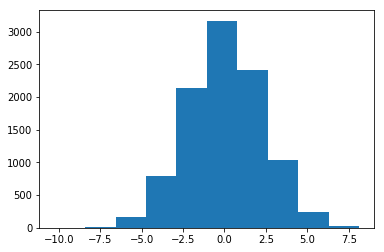

In [39]:
# plot null distribution
plt.hist(null_vals);

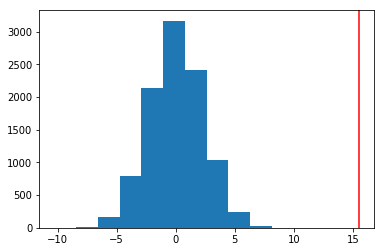

In [40]:
# plot null distribution and where our observed statistic falls
plt.hist(null_vals)
plt.axvline(x=obs_diff, color='red');

In [41]:
# compute p-value
(null_vals > obs_diff).mean()

0.0

我们统计量显然不是来自于这个零分布

## 平均课室逗留时长 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [44]:
df = pd.read_csv('datasets/ab_tests_datasets/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [45]:
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [46]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [47]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [48]:
# convert to numpy array
diffs = np.array(diffs)

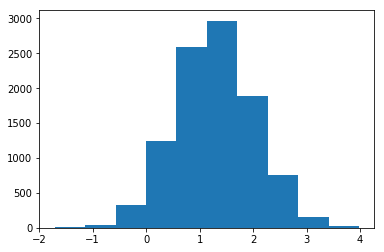

In [49]:
# plot sampling distribution
plt.hist(diffs);

In [50]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

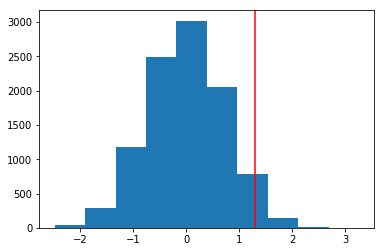

In [51]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, c='red')

In [52]:
# compute p value
(null_vals > obs_diff).mean()

0.0384

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.5nf8pc86pp9.png)

## 完成率 

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [54]:
df = pd.read_csv('datasets/ab_tests_datasets/classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [55]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_ctr = control_df.query('completed == True').id.nunique() / control_df.id.nunique()

# Display completion rate
control_ctr

0.3719951923076923

In [56]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df.query('completed == True').id.nunique() / experiment_df.id.nunique()

# Display completion rate
experiment_ctr

0.3935334872979215

In [57]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [58]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('completed == True').id.nunique() / control_df.id.nunique()
    experiment_ctr = experiment_df.query('completed == True').id.nunique() / experiment_df.id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [59]:
# convert to numpy array
diffs = np.array(diffs)

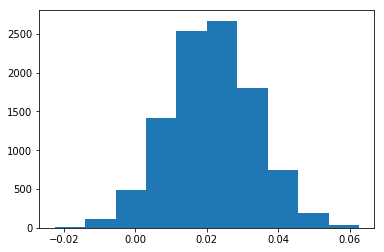

In [60]:
# plot distribution
plt.hist(diffs);

In [61]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

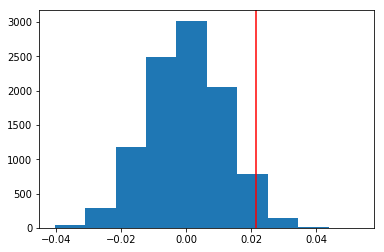

In [62]:
# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(obs_diff, c='red');

In [63]:
# compute p value
(null_vals > obs_diff).mean()

0.0363

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.xswgey62bgs.png)

# 分析多个指标 

你评估的指标越多，你观察到显著差异的偶然性就越高——之前涉及多测试的课程也有类似的情况。好在这个 [多重比较问题](https://en.wikipedia.org/wiki/Multiple_comparisons_problem)有多种办法可以解决。 

# Bonferroni 校正 

如果你还记得以前的课程，那你就知道[Bonferroni 校正](http://en.wikipedia.org/wiki/Bonferroni_correction)是处理多测试实验的方法之一，也就是说 Bonferroni 校正可以处理本案例多指标造成的问题。要计算新的 Bonferroni 校正显著值，我们需要让原显著值除以测试数量。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.ixhyx9ypl49.png)

## 哪个结果仍有统计显著性？ 

我们来根据新显著值判断，看哪些指标的观察差异具有统计显著性。以下是本实验四个指标的 p 值。（你应当用随机种子值 42 来获取这些 p 值。） 

1. 注册率： **0.0159** 
2. 平均浏览时长： **0** 
3. 平均教室逗留时长： **0.0384** 
4. 完成率： **0.0363** 

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.gvj163ub6bh.png)

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.d497smdk1vw.png)

# 得出结论 

一旦指标间有关联，Bonferroni 方案就显得太过保守，因此要更好地解决这个问题，我们可以用更复杂的办法，如[封闭测试程序](http://en.wikipedia.org/wiki/Closed_testing_procedure)、 [Boole-Bonferroni 联合校正](http://en.wikipedia.org/wiki/Bonferroni_bound) 以及 [Holm-Bonferroni 方案](http://en.wikipedia.org/wiki/Holm–Bonferroni_method)。这些都没有 Bonferroni 方案那么保守，而且会把指标间的相关性考虑在内。 

如果你真的选了没那么保守的方案，请确保方案假设的确适用于你的情况，而不是在 [糊弄 p 值](http://freakonometrics.hypotheses.org/19817)。为了得到显著性结果而选择不适合的测试方法只会造成决策有失偏颇，长期下来会伤害到你的公司业绩。 

# A/B 测试的难点 

虽然能确定 A/B 测试结果的效果差异统计显著性是项宝贵的技能，但要确保你自己开展了成功的 A/B 测试，你需要考虑很多其它的因素。在现实中，要设计、开展 A/B 测试、得出结论并根据结论做出正确决策并不容易。 

在下列练习中，你会遇到三个情景—— Audacity 开展了 A/B 测试，却做出不良决策。请思考是哪里出了错误、要如何避免这些后果。 


## 情景 1 

- **实验：**为了知道教室新布局是否有助于吸引学员，Audacity 对该布局进行了测试。在进行了为期两周的 A/B 测试后，Audacity 发现新布局组的平均教室逗留时长和完成率都降低了，于是决定不改动布局。 
- **现实：**但他们不知道的是，使用新布局的新学员在教室逗留的时长和完成率有显著提高。从长远来看，布局也有利于吸引老学员，只不过老学员现在具有抗拒改变的心理。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.tuk80a6nplp.png)

## 情景 2 

- **实验：**Audacity 测试了登录页面的一个新元素，该元素能全程指导用户选择课程，同时还为用户推荐课程。在进行了为期一月的 A/B 测试后，Audacity 发现配置了新元素的课程页面的点击率上升了（即注册率升高了），于是决定修改页面。 
- **现实：**他们不知道的是，虽然在新元素组中，总注册数增加了，但用户购买的几乎都是更短、更便宜的课程，因此拉低了 Audacity 的营收，也就是说，新元素使得更多学生更倾向于选择更多短期承诺的课程。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.mi5hsq68jy.png)

## 情景 3 

- **实验：**Audacity 有一门课程很难，注册率也很低，所以为该课程写了新描述，并进行了测试。Audacity 希望新描述能更激动人心，鼓励更多学生前来注册。在进行了为期五周的 A/B 测试后，Audacity 发现新描述组的注册率上升了，于是决定更改描述。 
- **现实：** 他们不知道的是，虽然新描述组的注册率看起来变高了，但这次 A/B 测试的结果并不可靠，因为随机性太高了，在本次试验中，数千名访客中只有 40 人进行了注册，因此就算课程只增加一名新学员，结果也会受到相当大的影响，甚至可能影响结论。

![image](https://raw.githubusercontent.com/hufe09/GitNote-Images/master/Picee/image.vroixw0nnq.png)

## A/B 测试难点 

正如你在上述情景看到的，设计 A/B 测试、基于测试结果得出结论都需要考虑诸多因素。下方总结了一些常见考虑因素： 

- 老用户第一次体验改动会有新奇效应和改变抗拒心理； 
- 要得到可靠的显著结果，需要有足够的流量和转化率； 
- 要做出最佳决策，需选用最佳指标（如营收 vs 点击率）； 
- 应进行足够的实验时长，以便解释天/周/季度事件引起的行为变化； 
- 转化率需具备现实指导意义（推出新元素的开支 vs 转化率提高带来的效益）； 
- 对照组和实验组的测试对象要有一致性（两组样本数失衡会造成[辛普森悖论](https://en.wikipedia.org/wiki/Simpson's_paradox)等现象的发生）。 